In [16]:
from tensorflow.keras.applications.resnet50 import ResNet50,decode_predictions,preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
modelResNet = ResNet50()

102981632/102967424 [==============================] - 23s 0us/step


In [3]:
modelResNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

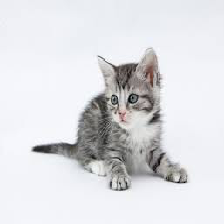

In [4]:
testImg = image.load_img( 'image/test.jpg', target_size=(224,224))
testImg

In [6]:
imgArr = image.img_to_array( testImg )
imgArr.shape

(224, 224, 3)

In [9]:
# imgArr.reshape( 1, 224, 224, 3)
arr= np.expand_dims( imgArr, axis=0)
arr.shape

(1, 224, 224, 3)

In [11]:
pred = modelResNet.predict( preprocess_input(arr) )
pred.shape

(1, 1000)

In [12]:
label = decode_predictions(pred)
print( label)

[[('n02123045', 'tabby', 0.49046153), ('n02124075', 'Egyptian_cat', 0.2513288), ('n02127052', 'lynx', 0.09021703), ('n02123159', 'tiger_cat', 0.05558683), ('n02128757', 'snow_leopard', 0.03569356)]]


### 전이 학습

In [19]:
model_vgg_conv = VGG16( include_top=False)

In [20]:
model_vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model_conv = ResNet50(weights='imagenet',include_top=False, input_shape=(98,98,3))

94781440/94765736 [==============================] - 19s 0us/step


In [14]:
model_conv.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 98, 98, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 104, 104, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 49, 49, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 49, 49, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [21]:
# 특징추출기는 학습시 제외...
for layer in model_conv.layers:
    layer.trainable = False

In [22]:
dataGen = image.ImageDataGenerator( rescale=1./255 )
trainGen = dataGen.flow_from_directory( 'image', target_size=(98,98))
x_train , y_train = trainGen.next()

Found 20 images belonging to 2 classes.


In [23]:
x_train.shape

(20, 98, 98, 3)

In [24]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [26]:
model = Sequential()
model.add(model_conv ) # con, relu ,pool
model.add( Flatten() )
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=2, activation='softmax'))
model.compile( loss='categorical_crossentropy', optimizer='adam',metrics=['acc'] )
model.fit( x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.2155 - acc: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 241ms/step - loss: 7.6365 - acc: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 221ms/step - loss: 6.0988 - acc: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 182ms/step - loss: 2.9407 - acc: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 180ms/step - loss: 0.6866 - acc: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 183ms/step - loss: 0.6931 - acc: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 180ms/step - loss: 0.6931 - acc: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 186ms/step - loss: 0.6931 - acc: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 180ms/step - loss: 0.6931 - acc: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 177ms/step - loss: 0.6932 - acc: 0.5000


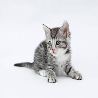

In [28]:
testImg = image.load_img( 'image/test.jpg', target_size=(98,98))

In [29]:
imgArr = image.img_to_array( testImg )

In [30]:
imgArr.shape

(98, 98, 3)

In [31]:
model.predict( preprocess_input( np.expand_dims( imgArr, axis=0) )  )

array([[0.44340634, 0.55659366]], dtype=float32)